In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass


In [79]:
def exp_decay_fit(xdata, ydata, start, stop, num):
    from scipy.optimize import curve_fit
    def exp_decay(x, A, B, C):
        return A * np.exp(-(x/B)) + C
    popt, pcov = curve_fit(exp_decay, xdata, ydata)
    xfit = np.linspace(start, stop, num)
    yfit = exp_decay(xfit, popt[0], popt[1], popt[2])
    return popt, xfit, yfit
    
def lin_fit(xdata, ydata, start, stop, num):
    from scipy.optimize import curve_fit
    def lin(x, A, B):
        return A * x + B
    popt, pcov = curve_fit(lin, xdata, ydata)
    xfit = np.linspace(start, stop, num)
    yfit = lin(xfit, popt[0], popt[1])
    return popt, xfit, yfit

def Ek_fit(xdata, ydata, start, stop, num):
    from scipy.optimize import curve_fit
    def Ek(x, A, B):
        return A * (1 - np.exp(-(x/B)))
    popt, pcov = curve_fit(Ek, xdata, ydata)
    xfit = np.linspace(start, stop, num)
    yfit = Ek(xfit, popt[0], popt[1])
    return popt, xfit, yfit
    

In [3]:
importlib.reload(ExperimentClass)
manip = ExperimentClass.Experiment("20230321_Ek_FvFm_Sinus", "JTS", local = "IBPC" , diff_xaxis = True)

In [4]:
manip.get_annotations()

,Record,Status,Freq,Offset
0,176,ok,1.0,0.30
1,177,pics,1.0,0.30
2,178,rate,1.0,0.30
3,179,ok,1.0,0.30
4,180,ok,1.0,0.30
...,...,...,...,...
91,267,pics,2.0,0.08
92,268,ok,2.0,0.08
93,269,ok,2.0,0.08
94,270,pics,2.0,0.08


In [5]:
ECS_flash_list = ["E11", "E12", "E13", "E14", "E20"]
ECS_pulse_list = ["E28", "E29", "E30","E35"]
Vitesse_photochimie_JTS_list = ["E41","E42","E45","E46","E47","E50","E51","E52","E55","E56","E57","E60"]
Vitesse_photochimie_PWM_list = ["E118", "E119", "E120", "E121", "E124", "E125", "E126", "E127", "E128", "E129", 
                                "E130", "E131", "E132", "E133"]
FvFm_list = ["E142"]
bode_list_pics = manip.get_keys_list(np.array(manip.annotations.query("Status == 'pics'").Record))
bode_list = manip.get_keys_list(np.array(manip.annotations.query("Status == 'ok'").Record))

In [6]:
manip.sub_experiments("ECS_flash", ECS_flash_list)
manip.sub_experiments("Vitesse_photochimie_JTS", Vitesse_photochimie_JTS_list)
manip.sub_experiments("Vitesse_photochimie_PWM", Vitesse_photochimie_PWM_list)
manip.sub_experiments("FvFm", FvFm_list)
manip.sub_experiments("Bode_diagram_pics", bode_list_pics)
manip.sub_experiments("Bode_diagram", bode_list)

In [7]:
#names_list = ["ECS_flash", "ECS_pulse", "Vitesse_photochimie_JTS", "Vitesse_photochimie_PWM", "FvFm", "Bode_diagram"]

In [8]:
#manip.get_all_sub_experiments(names_list, keys_list)

In [9]:
Bode_diagram = ExperimentClass.Experiment("Bode_diagram", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
Bode_diagram_pics = ExperimentClass.Experiment("Bode_diagram_pics", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
ECS_flash = ExperimentClass.Experiment("ECS_flash", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
Vitesse_photochimie_JTS = ExperimentClass.Experiment("Vitesse_photochimie_JTS", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
Vitesse_photochimie_PWM = ExperimentClass.Experiment("Vitesse_photochimie_PWM", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
FvFm = ExperimentClass.Experiment("FvFm", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")

In [10]:
FvFm.Data.iloc[:,0]

0      3872.762
1      3868.782
2      3850.816
3     11665.780
4     11478.160
5     11033.890
6     10262.350
7      9578.640
8      8794.695
9      7764.152
10     6844.432
11     6362.956
12     5931.629
13     5675.175
14     5195.037
15     4927.268
16     4613.520
Name: E142, dtype: float64

# Fv/Fm

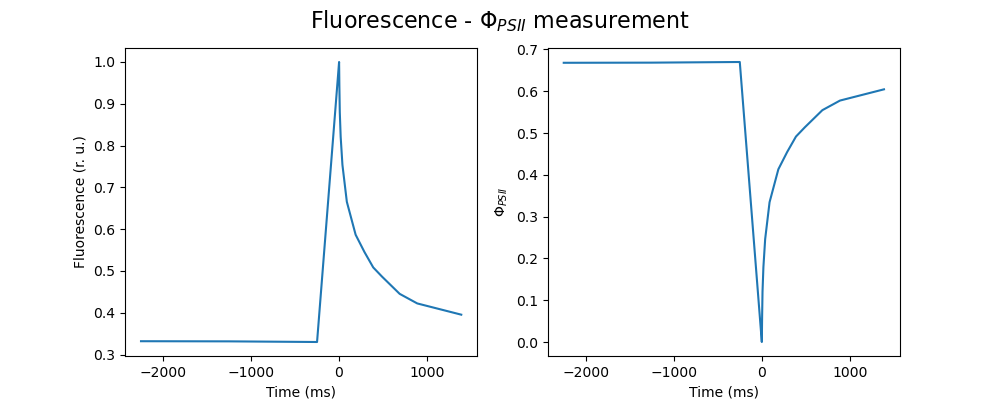

In [225]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

figure_name = "Fluorescence - $Φ_{PSII}$ measurement"
fig.suptitle(figure_name, fontsize = 16)


ax1.plot(FvFm.Time,FvFm.Data.iloc[:,0]/max(FvFm.Data.iloc[:,0]))
ax2.plot(FvFm.Time,1- FvFm.Data.iloc[:,0]/max(FvFm.Data.iloc[:,0]))
ax1.set_xlabel("Time (ms)")
ax2.set_xlabel("Time (ms)")
ax1.set_ylabel("Fluorescence (r. u.)")
ax2.set_ylabel("$Φ_{PSII}$")

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

# ECS calibration

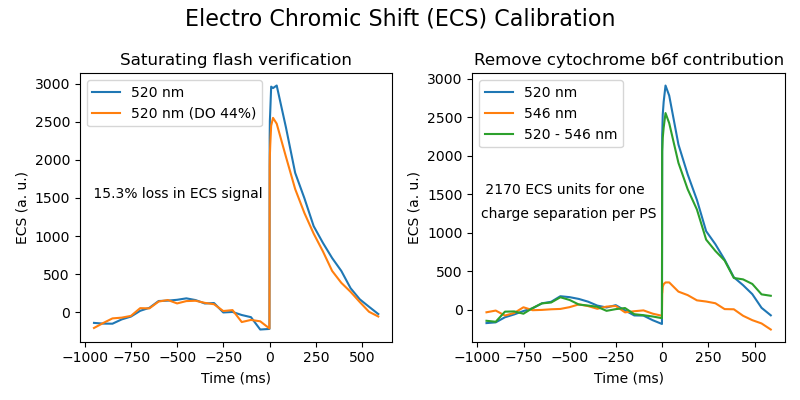

In [223]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
figure_name = "Electro Chromic Shift (ECS) Calibration"
fig.suptitle(figure_name, fontsize = 16)

ax1.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,0], label = "520 nm")
ax1.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,1], label = "520 nm (DO 44%)")
ax1.legend()
ax1.set_title("Saturating flash verification")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")

delta1 = ECS_flash.Data.iloc[20,0] - ECS_flash.Data.iloc[19,0]
delta2 = ECS_flash.Data.iloc[20,1] - ECS_flash.Data.iloc[19,1]
diff = 100 * (delta1 - delta2)/delta1

ax1.text( -980, 1500, f"{diff : .1f}% loss in ECS signal")

ax2.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,2], label = "520 nm")
ax2.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,3], label = "546 nm")
ax2.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,4], label = "520 - 546 nm")
ax2.legend()
ax2.set_title("Remove cytochrome b6f contribution")
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("ECS (a. u.)")

delta1 = ECS_flash.Data.iloc[20,4] - ECS_flash.Data.iloc[19,4]

ax2.text( -980, 1500, f"{delta1 : .0f} ECS units for one")
ax2.text( -980, 1200, f"charge separation per PS")

fig.tight_layout()

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

# $E_{k}$ determination using JTS LEDs

C:\Users\Orlando\anaconda3\envs\PhD_environment\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Orlando\anaconda3\envs\PhD_environment\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


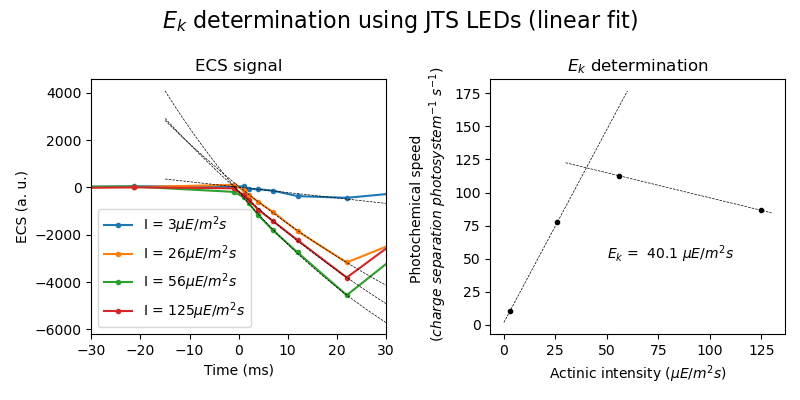

In [222]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
figure_name = "$E_{k}$ determination using JTS LEDs (linear fit)"
fig.suptitle(figure_name, fontsize = 16)

ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E55"], '-o', label = "I = $3 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E60"], '-o', label = "I = $26 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E45"], '-o', label = "I = $56 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E50"], '-o', label = "I = $125 µE/m^{2}s$", markersize = 3)

ax1.legend()
ax1.set_title("ECS signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")
ax1.set_xlim([-30,30])

start = -15
stop = 30
num = 50

xfit = []
yfit = []
param = []
vitesse = []

for i, k in enumerate(["E55","E60","E45","E50"]):
    xdata = Vitesse_photochimie_JTS.Time[20:26]
    ydata = Vitesse_photochimie_JTS.Data[k][20:26]
    popt, x, y = exp_decay_fit(xdata, ydata, start, stop, num)
    xfit.append(x)
    yfit.append(y)
    param.append(popt)
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.5)
    vitesse.append(param[i][0]/param[i][1])
    
intensity_array = [3, 26, 56, 125]

ax2.plot(intensity_array, 1000*(np.array(vitesse)/2170),'o', color ='k', markersize = 3)

popt1, x, y = lin_fit(intensity_array[0:2], 1000*(np.array(vitesse)/2170)[0:2], 0, 60, 50)
ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

popt2, x, y = lin_fit(intensity_array[2:], 1000*(np.array(vitesse)/2170)[2:], 30,130, 50)
ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

Ek = (popt2[1] - popt1[1])/(popt1[0] - popt2[0])

ax2.text( 50, 50, "$E_{k}$ = " + f"{Ek : .1f} " + "$µE/m^{2}s$")
    
    
ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity ($µE/m^{2}s$)")
ax2.set_ylabel("Photochemical speed \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")

fig.tight_layout()

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

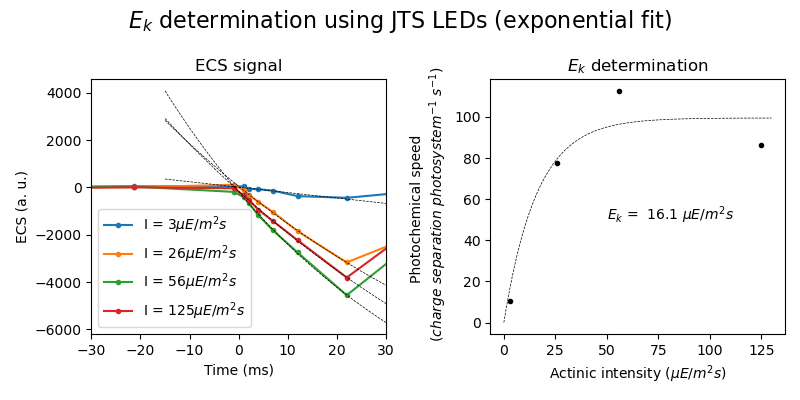

In [220]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
figure_name = "$E_{k}$ determination using JTS LEDs (exponential fit)"
fig.suptitle(figure_name, fontsize = 16)

ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E55"], '-o', label = "I = $3 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E60"], '-o', label = "I = $26 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E45"], '-o', label = "I = $56 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E50"], '-o', label = "I = $125 µE/m^{2}s$", markersize = 3)

ax1.legend()
ax1.set_title("ECS signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")
ax1.set_xlim([-30,30])

start = -15
stop = 30
num = 50

xfit = []
yfit = []
param = []
vitesse = []

for i, k in enumerate(["E55","E60","E45","E50"]):
    xdata = Vitesse_photochimie_JTS.Time[20:26]
    ydata = Vitesse_photochimie_JTS.Data[k][20:26]
    popt, x, y = exp_decay_fit(xdata, ydata, start, stop, num)
    xfit.append(x)
    yfit.append(y)
    param.append(popt)
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.5)
    vitesse.append(param[i][0]/param[i][1])
    
intensity_array = [3, 26, 56, 125]

ax2.plot(intensity_array, 1000*(np.array(vitesse)/2170),'o', color ='k', markersize = 3)

popt, x, y = Ek_fit(intensity_array, 1000*(np.array(vitesse)/2170), 0, 130,100)

ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

Ek = popt[1]

ax2.text( 50, 50, "$E_{k}$ = " + f"{Ek : .1f} " + "$µE/m^{2}s$")
    
    
ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity ($µE/m^{2}s$)")
ax2.set_ylabel("Photochemical speed \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")

fig.tight_layout()

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

# $E_{k}$ determination using PWM

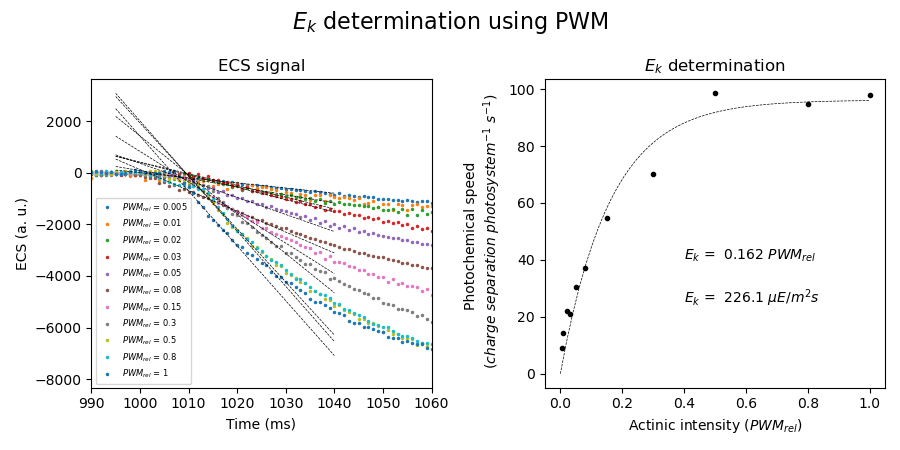

In [219]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (9,4.5))
figure_name = "$E_{k}$ determination using PWM"
fig.suptitle(figure_name, fontsize = 16)

PWM_rel = [0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.15, 0.3, 0.5, 0.8, 1]
record_list = ["E124", "E121", "E125", "E126", "E127", "E128", "E129", "E130", "E131", "E132", "E133"]

for i, k in enumerate(record_list) :
    ax1.plot(Vitesse_photochimie_PWM.Time,Vitesse_photochimie_PWM.Data[k], 'o', label = "$PWM_{rel}$ = " + f"{PWM_rel[i]}", 
             markersize = 1.5, linewidth = 1)

ax1.legend(prop={'size': 6})
ax1.set_title("ECS signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")
ax1.set_xlim([990,1060])

start = 995
stop = 1040
num = 50

xfit = []
yfit = []
param = []
vitesse = []

for i, k in enumerate(record_list):
    xdata = Vitesse_photochimie_PWM.Time[110:120]
    ydata = Vitesse_photochimie_PWM.Data[k][110:120]
    popt, x, y = lin_fit(xdata, ydata, start, stop, num)
    xfit.append(x)
    yfit.append(y)
    param.append(popt)
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.5)
    vitesse.append(-param[i][0])
    

ax2.plot(PWM_rel, 1000*(np.array(vitesse)/2170),'o', color ='k', markersize = 3)

popt, x, y = Ek_fit(PWM_rel, 1000*(np.array(vitesse)/2170), 0, 1,50)

ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

Ek = popt[1]

ax2.text( 0.4, 40, "$E_{k}$ = " + f"{Ek : .3f} " + "$PWM_{rel}$")

Ek_true = 1326 * Ek + 11.9

ax2.text( 0.4, 25, "$E_{k}$ = " + f"{Ek_true : .1f} " + "$µE/m^{2}s$")
    
    
ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity ($PWM_{rel}$)")
ax2.set_ylabel("Photochemical speed \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")

fig.tight_layout()

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

In [217]:
from scipy.signal import find_peaks

def FFT(Time, Signal):

    fs = 1 / (Time[1] - Time[0])
    freq = np.fft.fftfreq(len(Time), 1/fs) 
    F = freq[1:int(len(freq)/2)]
    ft = np.fft.fft(Signal)
    A = np.abs(ft[1:int(len(freq)/2)])
    P = np.angle(ft[1:int(len(freq)/2)])
    
    return F, A, P

def plot_spectrum(Time, Data, Rec, Actinic_freq, Offset, Amp, nb_period_show):
    figure_name = f"{Rec}, F = {Actinic_freq} Hz, Amplitude = {Offset} ± {Amp}" + " $PWM_{rel}$, steady state"
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (9, 3))
    fig.suptitle(figure_name)
    ax1.plot(Time, Data/1000)
    ax1.set_xlim([0, min(nb_period_show*(1/Actinic_freq), max(Time))])
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("ECS (x $10^{3}$ a. u.)")

    F, A, P = FFT(Time, Data)
    peaks, _ = find_peaks(A, threshold= max(A)/100)

    ax2.plot(F, A/10000)
    ax2.plot(F[peaks],A[peaks]/10000, 'x', markersize = 3 )
    ax2.set_xlabel("Frequency (Hz)")
    ax2.set_ylabel("Magnitude x $10^{4}$")
    ax2.set_xlim([0, min(F[peaks[-1]]+0.1, max(F))])

    ax3.plot(F[peaks],P[peaks]*180/np.pi, 'o',  markersize = 4)
    ax3.set_xlabel("Frequency (Hz)")
    ax3.set_ylabel("Phase (degrees)")
    ax3.set_ylim([-180, 180])
    y_tick_labels = ['-180°','','-90°','', '0°','', '90°','', '180°']
    ax3.set_yticks(np.linspace(-180, 180, len(y_tick_labels)))
    ax3.set_yticklabels(y_tick_labels)
    ax3.grid(which = 'both')
    
    fig.tight_layout()
    
    return fig
    

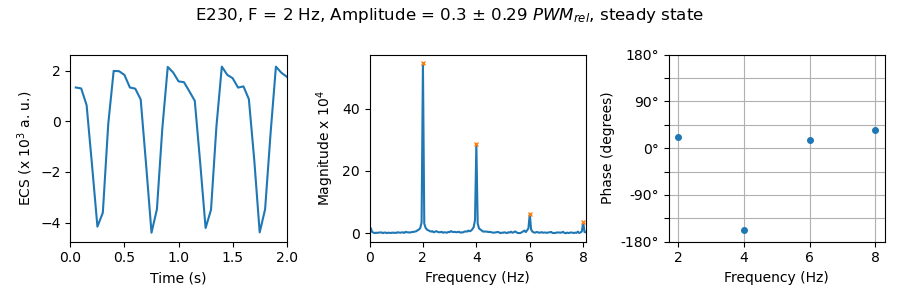

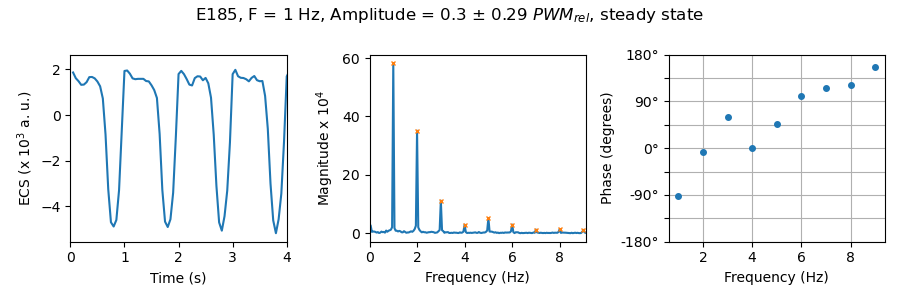

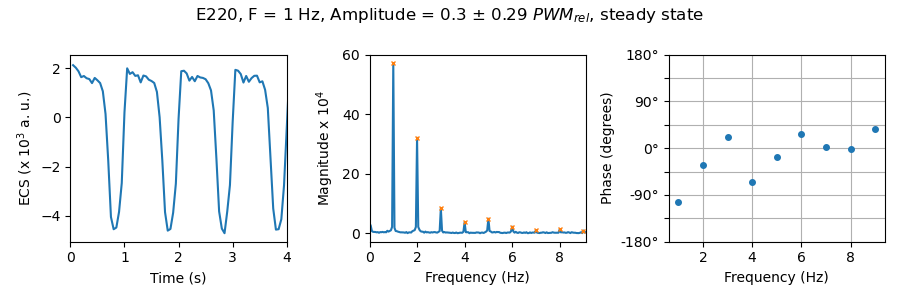

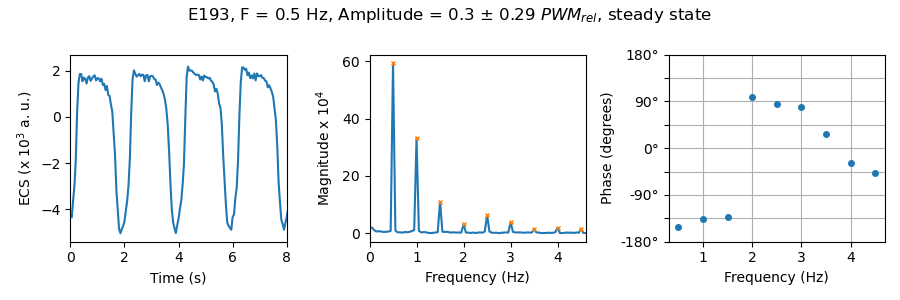

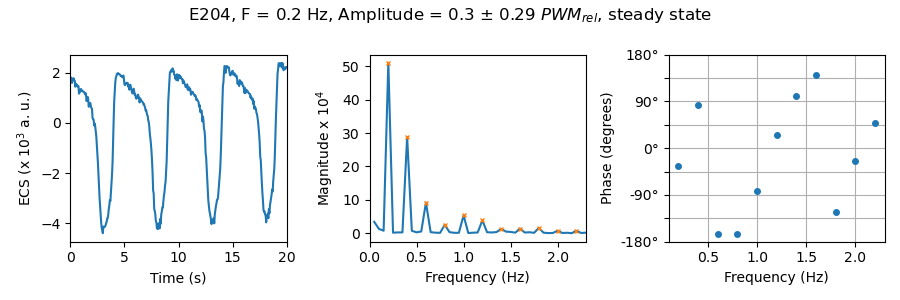

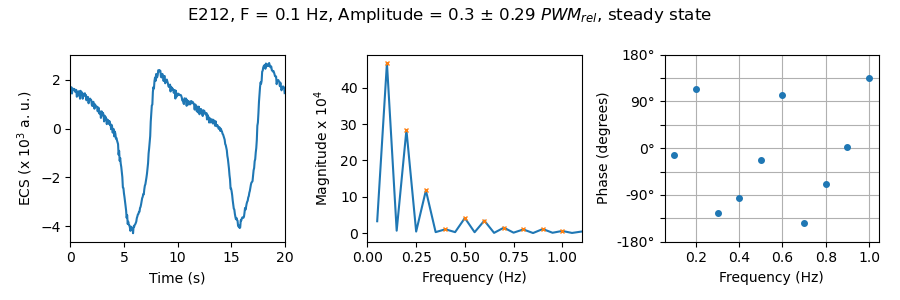

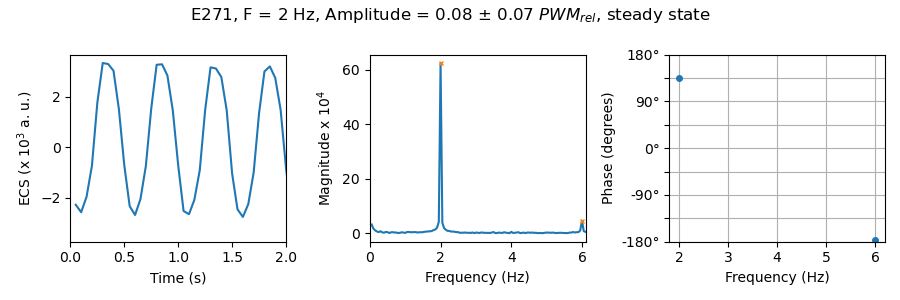

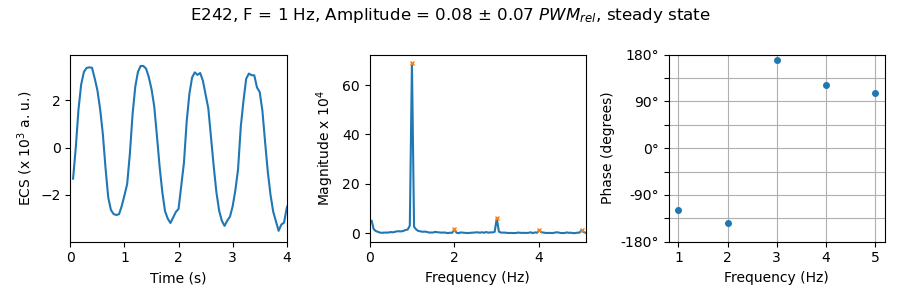

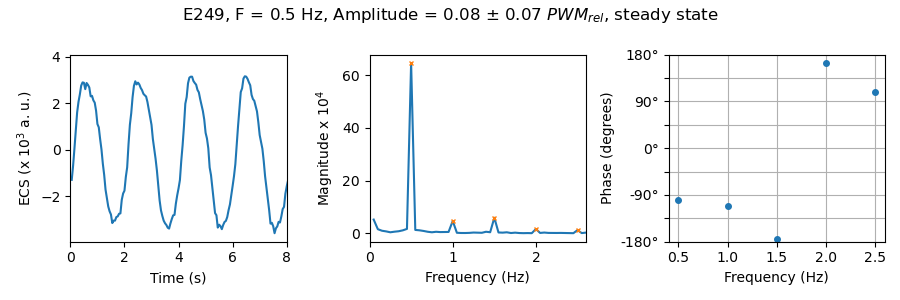

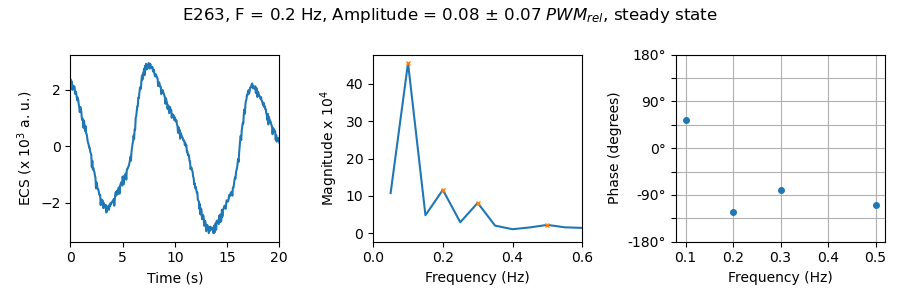

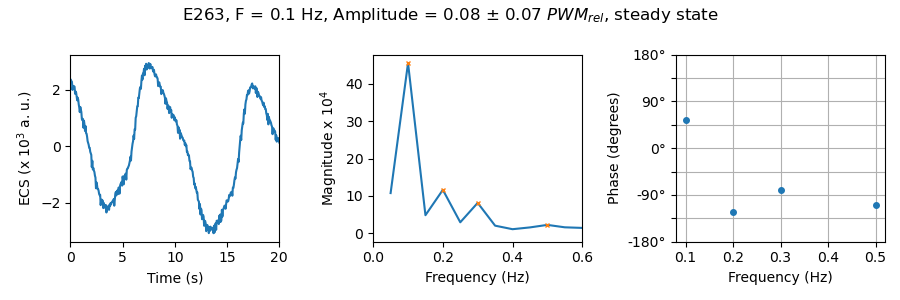

In [218]:
Time = Bode_diagram.Time/1000
record_list = ["E230", "E185", "E220", "E193", "E204", "E212", "E271", "E242", "E249", "E263", "E263"]
Actinic_freq = [2,1,1,0.5,0.2,0.1,2,1,0.5,0.2,0.1]
nb_period_show = 4
Offset = [0.3,0.3,0.3,0.3,0.3,0.3,0.08,0.08,0.08,0.08,0.08]
Amp = [0.29,0.29,0.29,0.29,0.29,0.29,0.07,0.07,0.07,0.07,0.07]

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

for i, k in enumerate(record_list):
    fig = plot_spectrum(Time, Bode_diagram.Data[k], k, Actinic_freq[i], Offset[i], Amp[i], nb_period_show)
    figure_name = f"{k}, F = {Actinic_freq[i]} Hz, Amplitude = {Offset[i]} ± {Amp[i]}" + " $PWM_{rel}$, steady state"
    fig.savefig(fig_folder + "/" + figure_name + ".png")

In [202]:
pd.set_option('display.max_columns', 500)
Bode_diagram.Data

,E176,E179,E180,E181,E183,E185,E191,E193,E198,E201,E204,E207,E209,E210,E211,E212,E216,E220,E224,E230,E232,E233,E234,E236,E237,E238,E239,E241,E242,E244,E245,E246,E247,E248,E249,E250,E251,E253,E254,E255,E257,E258,E260,E261,E262,E263,E265,E266,E268,E269,E271
0,1373.88100,2108.48000,673.99220,1524.72300,-2435.70800,1861.11600,-4270.96100,-4334.727000,1217.87500,338.253900,1776.78500,230.984400,1063.02000,231.039100,-1612.508000,1621.67600,-2464.41400,2123.84400,1749.94900,1332.309000,607.946000,-1398.903000,2772.860000,-2393.90900,2886.47900,1177.17300,3278.10600,-2280.90600,-1320.721000,-1987.771000,2201.016000,1905.627000,2618.872000,1780.554000,-1287.788000,36.773440,-1073.658000,2624.700000,2482.005000,2692.36100,-371.59770,-2218.12600,1941.504000,2634.33500,2411.578000,2355.473000,-1687.47300,2004.59800,-1797.516000,-109.589800,-2281.104000
1,1285.17100,536.69730,492.76950,1513.15400,74.25684,1611.82800,-4009.51000,-3624.547000,1387.91400,140.472700,1807.67600,-6.980469,840.26560,392.312500,-1740.070000,1693.00000,-4004.68400,2021.73000,1371.53100,1293.199000,1255.133000,-1131.456000,2566.956000,-1964.15400,2558.28400,115.52490,3239.34500,-2013.77100,4.343018,-2097.390000,2055.379000,2123.278000,2547.617000,2287.000000,-685.573200,-286.051800,-1225.283000,2577.482000,2751.693000,2728.96200,-333.83200,-1972.25500,1949.284000,2642.57400,2446.514000,2307.489000,-2615.98400,450.54880,-2474.773000,-1916.740000,-2577.125000
2,1042.22700,-2138.72500,162.65040,1249.64300,2167.94000,1482.80200,-3102.20100,-2988.469000,1376.14500,-282.113300,1599.23800,191.062500,973.90230,518.757800,-2062.484000,1436.29300,-4124.16800,1875.46900,964.21480,634.601600,1578.733000,-169.258100,2474.070000,-1538.05000,2014.16600,-914.41650,3011.35800,-1447.21500,1616.673000,-1587.707000,1548.573000,2214.928000,2480.396000,2569.832000,50.571290,-275.880900,-1031.057000,2466.786000,2741.480000,2732.75100,-371.83790,-1838.93300,2096.470000,2315.92800,2244.236000,2293.185000,-2238.46100,-1448.56100,-2168.615000,-2562.605000,-1967.219000
3,335.16460,-4710.89100,-866.31640,1276.38700,2079.27800,1321.55000,-2054.81300,-1844.627000,1331.51200,-648.927700,1735.90200,185.601600,1024.04700,681.242200,-2083.453000,1622.36300,-3722.90200,1637.03500,163.40230,-1724.447000,2312.731000,612.154800,2042.287000,-925.84080,1282.40000,-1526.58600,2559.68300,-705.93480,2677.588000,-1644.849000,1703.875000,2315.449000,2364.829000,2686.411000,849.668900,-479.594700,-865.800800,2456.119000,2661.730000,2525.85700,-220.55080,-1721.66800,2136.678000,2404.38900,2087.494000,2002.727000,-1317.96900,-2298.36300,-861.460900,-2076.502000,-729.662100
4,-1213.61400,-5395.93900,-2757.05100,716.62110,1912.10100,1331.85300,43.46875,237.138700,1310.42200,-1296.793000,1734.70700,297.668000,992.53130,617.777300,-2314.254000,1631.92200,-2828.66000,1683.70700,-2804.69900,-4160.154000,2692.183000,1451.229000,1443.733000,-18.87207,301.48340,-2247.38300,2081.82600,671.93490,3205.255000,-1036.435000,1409.712000,2451.275000,2112.630000,2617.651000,1609.215000,-532.566400,-821.640600,2359.618000,2640.146000,2625.94400,-132.23050,-1791.51400,2185.516000,2231.18100,2352.168000,2128.315000,579.81050,-2231.28500,891.714800,-974.027300,1764.320000
5,-3401.59500,-3701.97700,-4055.15800,-624.38090,1763.89300,1439.18700,1562.87500,1471.686000,1308.59000,-1495.867000,1785.13300,292.210900,999.91800,830.632800,-2497.984000,1573.74600,-1106.38300,1593.11700,-3581.27700,-3609.564000,2581.170000,1916.014000,788.107900,1269.51600,-710.45310,-2101.69200,1282.25600,2220.55600,3373.569000,-884.180700,1083.136000,2296.161000,1878.950000,2968.864000,2059.850000,-735.280300,-574.334000,2229.851000,2330.529000,2644.86800,-50.20117,-1664.52000,2249.500000,2348.84100,2355.666000,2146.847000,2324.67400,-1240.46500,3012.202000,1144.176000,3338.055000
6,-4566.51300,-523.51370,-4523.14100,-2688.71700,1645.35200,1658.21200,1632.68900,1858.246000,1298.19500,-2132.229000,1696.44500,390.265600,910.40230,947.214800,-2588.715000,1623.750